In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


C:\Users\tmachine\AppData\Local\Temp\ipykernel_12264\256808149.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
df=pd.read_csv('E:/T-Machine/homeprices_banglore.csv')
df.sample(5)

,area,bedrooms,price
0,1056,2,39.07
18,2770,3,102.00
11,2785,4,140.00
13,1100,2,40.00
2,1440,3,62.00


In [10]:
print(df.shape[0])  # shape[0] means gives number of rows 
print(df.shape[1])  #shpe[1] means gives number of columns

20
3


In [6]:
from sklearn import preprocessing
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price',axis='columns'))  #his drops the ‘price’ column from your DataFrame. The axis='columns' argument specifies that ‘price’ is a column name.
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [7]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [12]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features=X.shape[1]
    total_samples = X.shape[0]
    w=np.ones(shape=(number_of_features))
    b=0

    cost_list =[]
    epoch_list=[]

    for i in range(epochs):
        y_predict = np.dot(w,scaled_x.T)+b

        w_grad= -(2/total_samples)*(X.T.dot(y_true-y_predict))
        b_grad= -(2/total_samples)*np.sum(y_true-y_predict)

        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad

        cost = np.mean(np.square(y_true-y_predict))

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500) 
w,b,cost      



(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

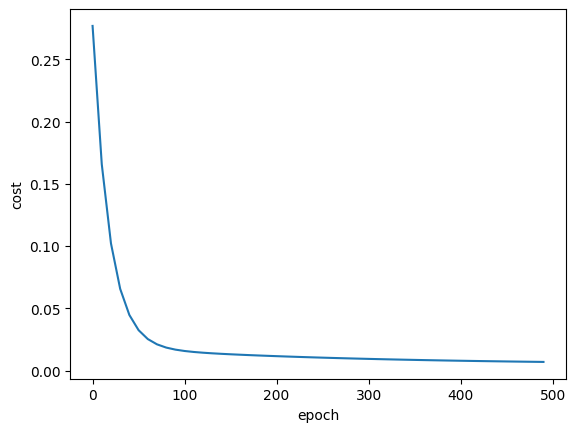

In [13]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)
plt.show()

In [14]:
def predict(area,bedrooms,w,b):
    scaled_x=sx.transform([[area,bedrooms]])[0]
    scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]
predict(2600,4,w,b)


c:\Users\tmachine\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [16]:
predict(1000,2,w,b)

c:\Users\tmachine\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [23]:
import random
def stochastic_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features=X.shape[1]
    total_samples = X.shape[0]
    w=np.ones(shape=(number_of_features))
    b=0

    cost_list =[]
    epoch_list=[]

    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index] 
        sample_y = y_true[random_index]
        y_predict = np.dot(w,sample_x.T)+b

        w_grad= -(2/total_samples)*(sample_x.T.dot(sample_y-y_predict))
        b_grad= -(2/total_samples)*(sample_y-y_predict)

        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad

        cost = np.mean(np.square(sample_y-y_predict))

        if i%100==0: # for every 100th iteration record the cost ad epoch value
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000) 
w_sgd,b_sgd,cost_sgd      



(array([0.70540968, 0.6757795 ]), -0.23397097669670386, 0.02180382793171985)

In [24]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

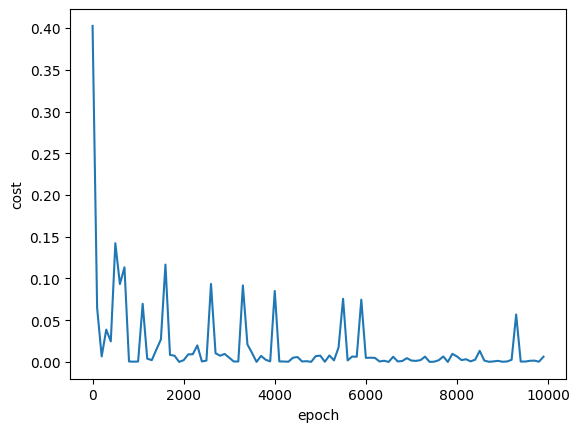

In [25]:
plt.xlabel("epoch")
plt.ylabel('cost')
plt.plot(epoch_list_sgd,cost_list_sgd)

In [26]:
predict(2600,4,w_sgd,b_sgd)

c:\Users\tmachine\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


127.94505938235743

In [31]:
def Mini_batch_gradient_descent(X,y_true,epochs,learning_rate=0.01,batch_size = 5):
    number_of_features=X.shape[1]
    total_samples = X.shape[0]
    w=np.ones(shape=(number_of_features))
    b=0

    if batch_size>total_samples:
        batch_size = total_samples

    cost_list =[]
    epoch_list=[]

    for i in range(epochs):
        random_index = np.random.permutation(total_samples)
        x_tmp = X[random_index]
        y_tmp = y_true[random_index]

        for j in range(0,total_samples,batch_size):
            xj = x_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]

            y_predict = np.dot(w,xj.T)+b

        w_grad= -(2/len(xj))*(xj.T.dot(yj-y_predict))
        b_grad= -(2/len(xj))*np.sum(yj-y_predict)

        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad

        cost = np.mean(np.square(yj-y_predict))

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

w,b,cost,cost_list,epoch_list = Mini_batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),epochs=500,batch_size=5) 
w,b,cost      



(array([0.70963733, 0.67660279]), -0.2300818127719326, 0.005510052933529932)

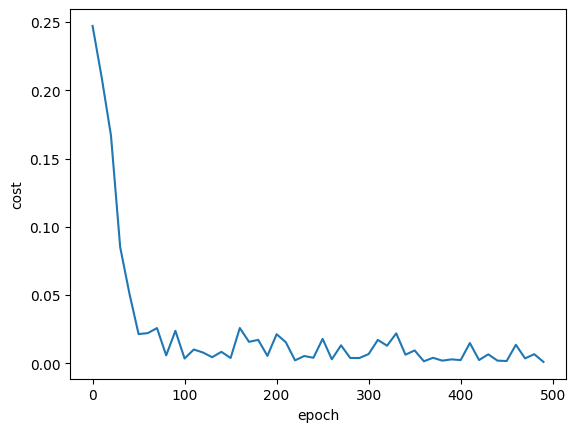

In [32]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [33]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

c:\Users\tmachine\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.90770156221419